# ECSE415 Assignment 2
# Mai Zeng
# 260782174

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift

## 1 Invariance of SIFT Features
### 1.1 Invariance Under Changes in Scale

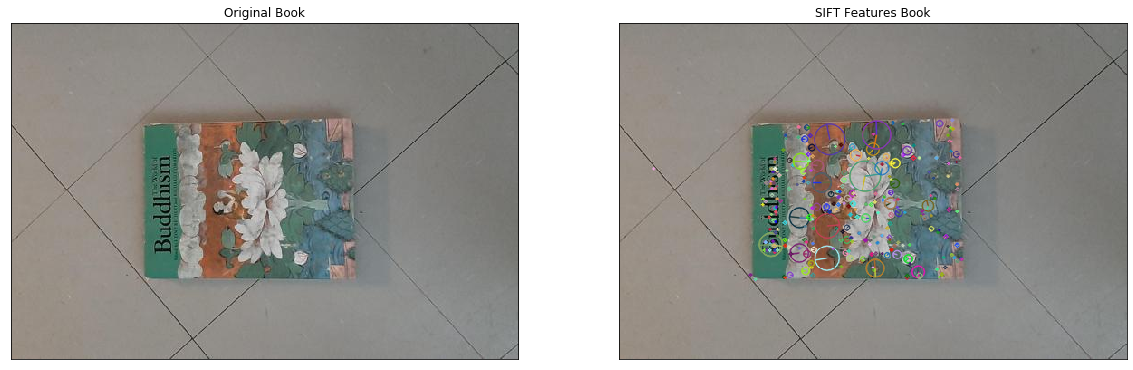

Num keypoints: 385


In [5]:
# load image 
img = cv2.imread("book.jpg")
# copy image
img_disp = img.copy()
# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)

# 1. Compute SIFT keypoints for the reference image
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create() # replace with SURF_create() for SURF features

# detect SIFT features, with no masks
# 'None' is a mask but here is no masks so it is none
# Sometime we want to just compute the key points just in the mask
keypoints = sift.detect(img, None)

# draw the keypoints
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# display
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(img)
plt.title("Original Book"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("SIFT Features Book"), plt.xticks([]), plt.yticks([])
plt.show()

# num of SIFT keypoints
print('Num keypoints: '+ str(len(keypoints)))

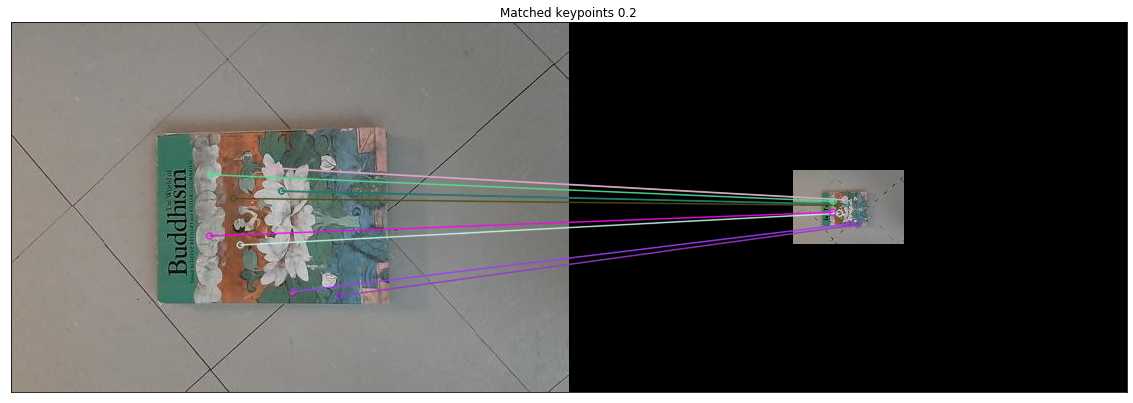

descriptors size: (385, 128)


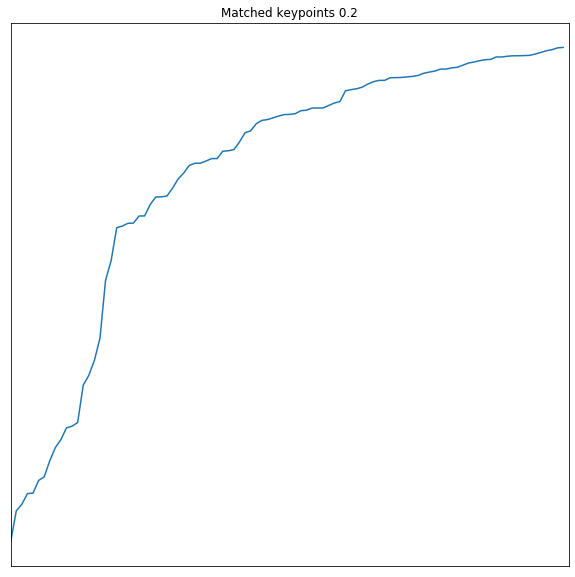

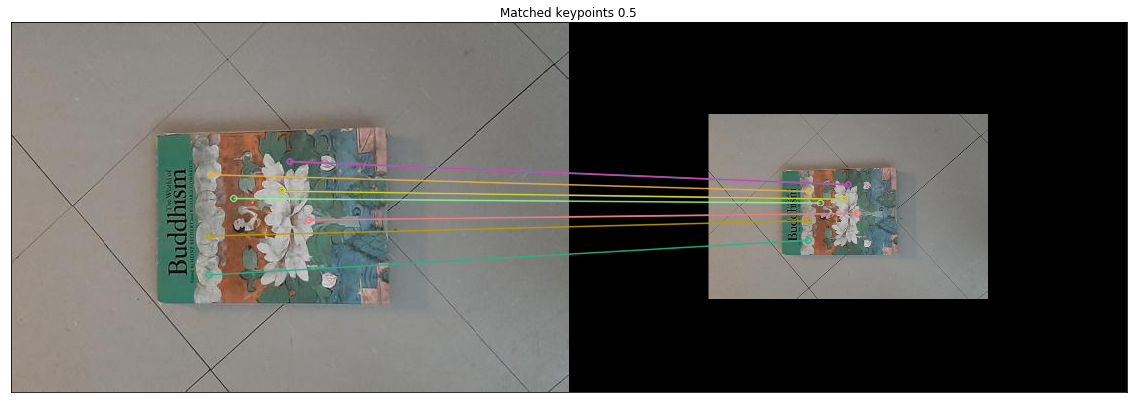

descriptors size: (385, 128)


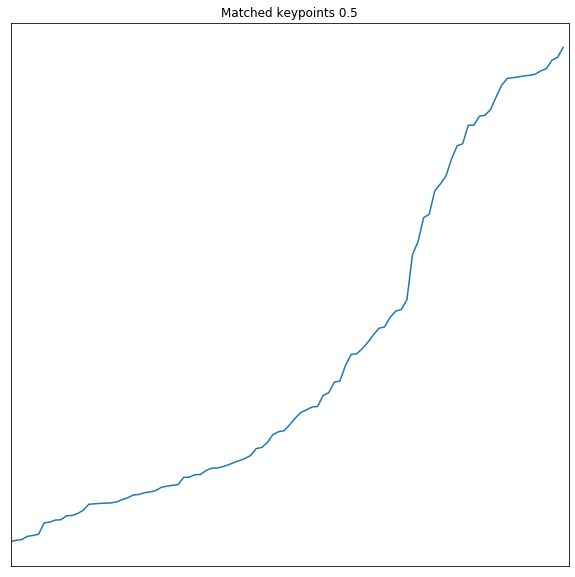

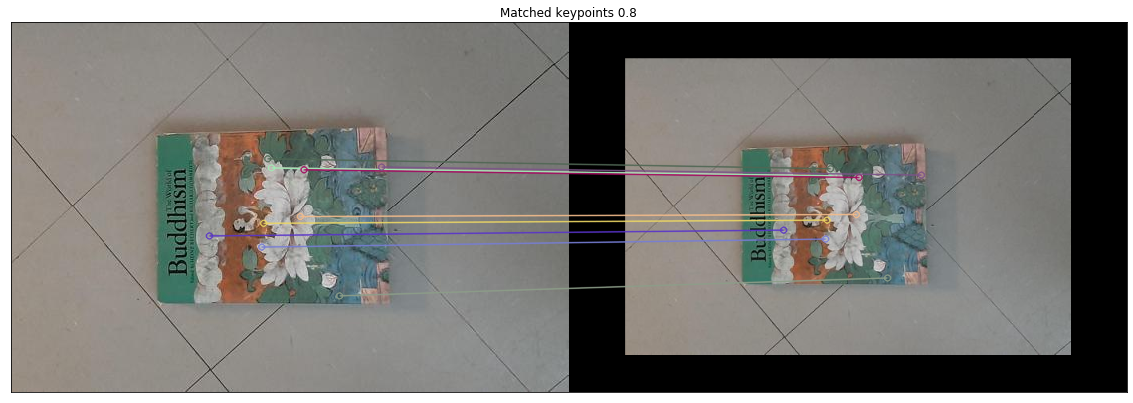

descriptors size: (385, 128)


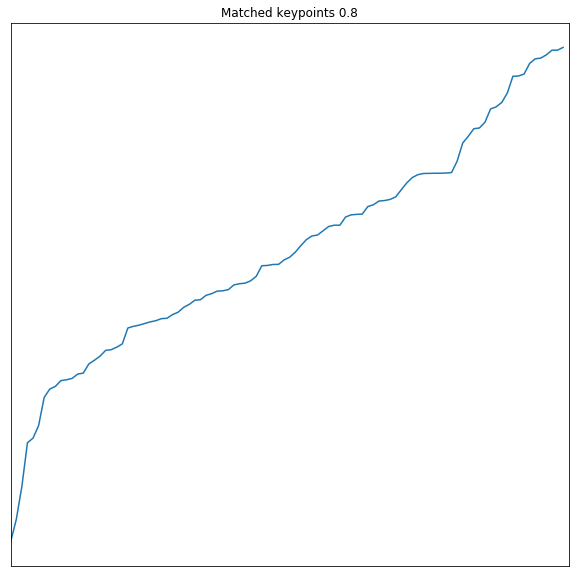

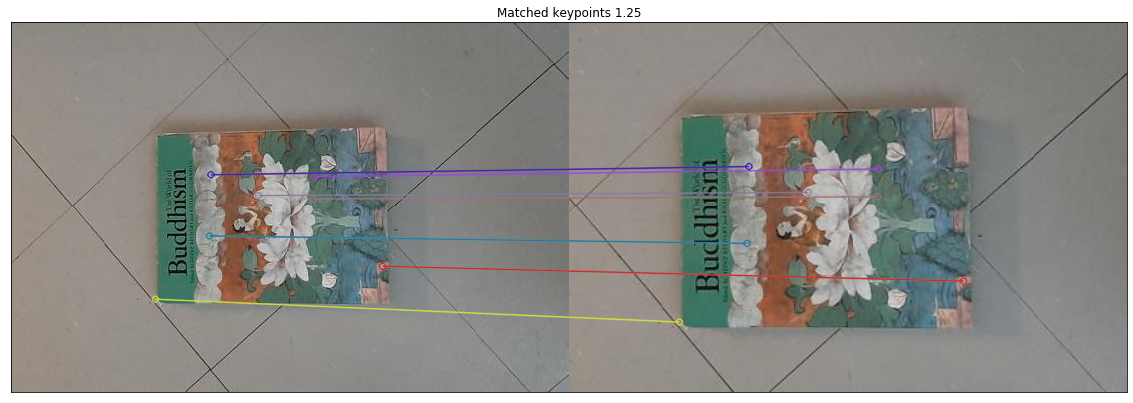

descriptors size: (385, 128)


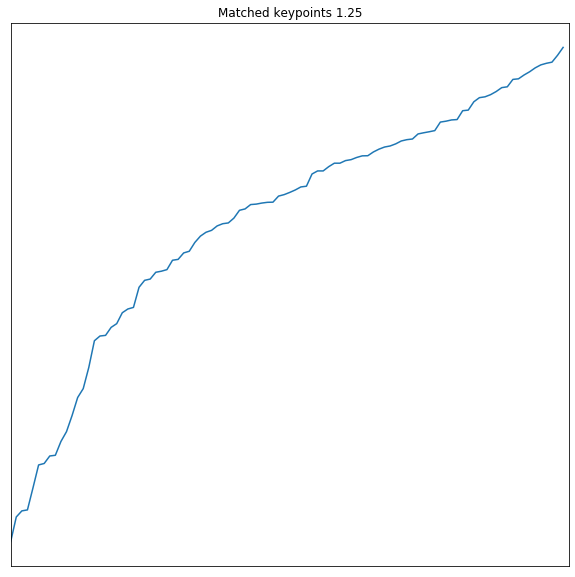

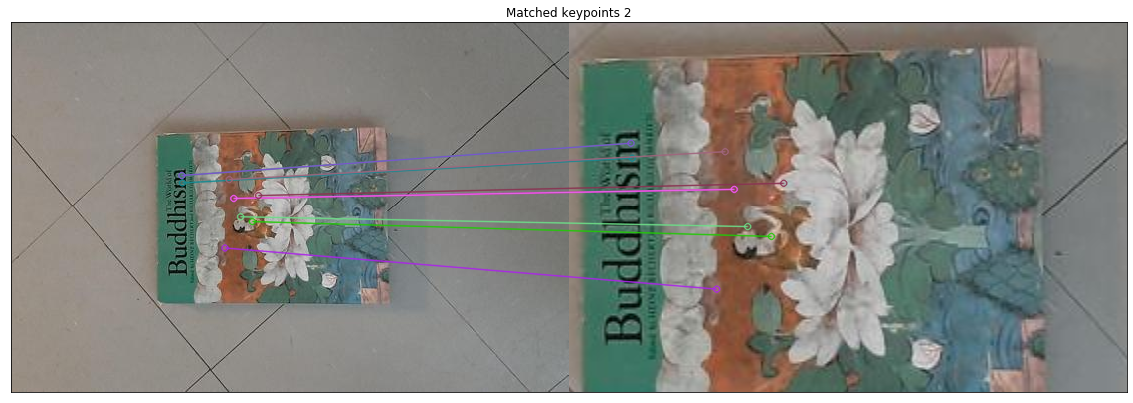

descriptors size: (385, 128)


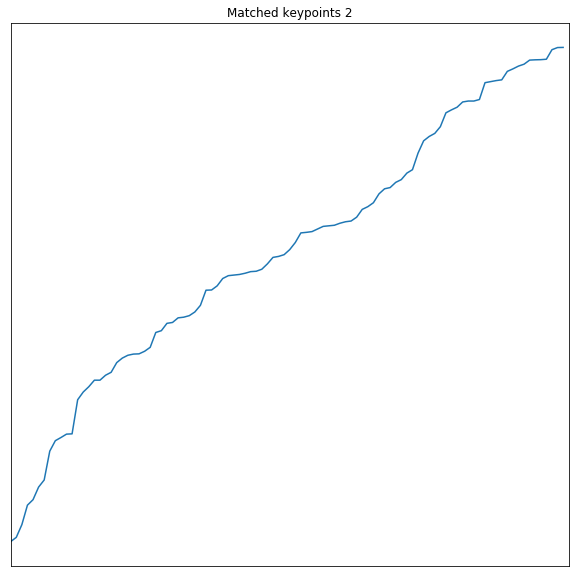

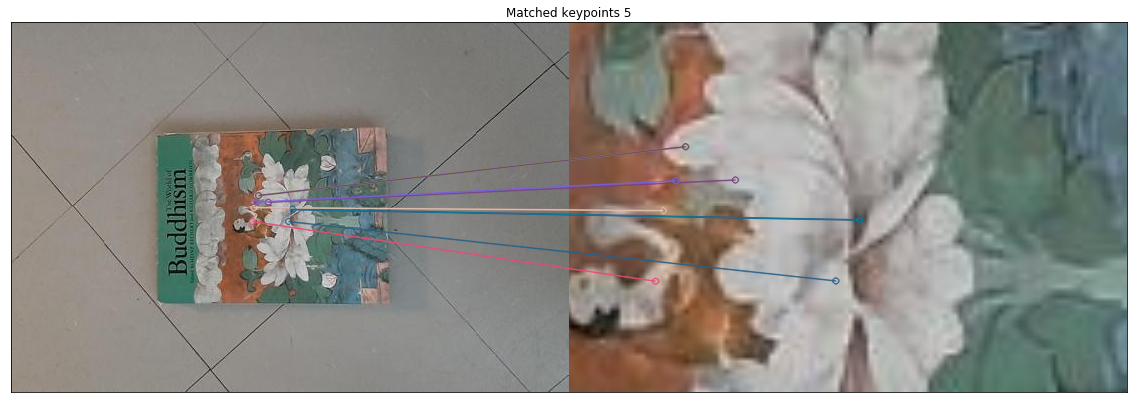

descriptors size: (385, 128)


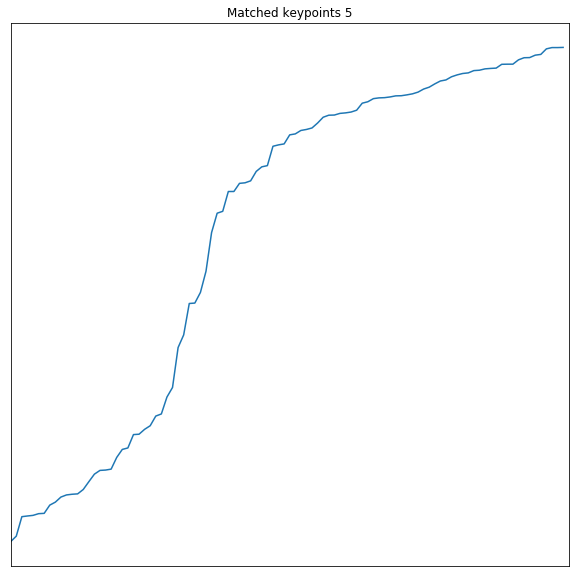

In [26]:
### 2. Scale reference image using scaling factors of (0.2, 0.5, 0.8, 1.25, 2, 5).
# load image 
img_book = cv2.imread("book.jpg")
# convert to RGB
img_book = cv2.cvtColor(img_book, cv2.COLOR_BGR2RGB)

# Get height and width in order
height, width = img_book.shape[0:2] # image size

scales = {0.2, 0.5, 0.8, 1.25, 2, 5}
img_book_scaled = {}

# 3. Compute SIFT keypoints for the transformed images
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create() # replace with SURF_create() for SURF features
title = "Matched keypoints {}"
for scale in sorted(scales):
    # Create a rotated, scaled duplicate
    # rotation marix around the center pixel, 0 degrees,scale of 0.2, 0.5, 0.8, 1.25, 2, 5
    # Actually get the pivot, so it not necessary is 1/2
    M_scaled = cv2.getRotationMatrix2D((width/2,height/2),0,scale)
    # Apply the transformation matrix
    # Why i need the size of the image: if I transform it (rotate it) the object is actually out of the image
    img_book_scaled[scale] = cv2.warpAffine(img_book,M_scaled,(width,height))
    # detect SIFT features, with no masks
    # 'None' is a mask but here is no masks so it is none
    # Sometime we want to just compute the key points just in the mask
    img_book_cpoy = img_book.copy()
    image_scaled_copy = img_book_scaled[scale].copy()
    keypoints,descriptors = sift.detectAndCompute(img_book_cpoy,None)
    keypoints_scaled,descriptors_scaled = sift.detectAndCompute(image_scaled_copy, None) 
    # create BFMatcher object
    # BF == brute force
    bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)
    # 4. Match all keypoints of the reference image to the transformed images using a brute-force method.
    # Match descriptors.
    # Match the first arguement to the second
    matches = bf.match(descriptors,descriptors_scaled) #query image, train image
    # 5. Sort matching keypoints according to the matching distance. (2 points)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    # 6. Display top ten matched keypoints for each pair of reference image and a transformed image.     
    # Draw first 10 matches.
    img_matches = cv2.drawMatches(img_book_cpoy,keypoints
                                  ,image_scaled_copy,keypoints_scaled, matches[:10], None, flags=2)
    plt.figure(figsize=(20,20))
    plt.imshow(img_matches)
    plt.title(title.format(scale)), plt.xticks([]), plt.yticks([])
    plt.show()
    
    # num of SIFT keypoints/descriptors
    print('descriptors size: '+ str(descriptors.shape))

#     for match in sorted(matches):
        # plot the 256x1 np array using matplotlib plot()
    plt.figure(figsize=(10,10))
    x = []
    y = []
    i = 0
    for match in matches[:100]:
        x.append(i)
        y.append(match.distance)
        i = i + 1
    plt.plot(x,y)
    plt.ylabel("Distance")
    plt.xlabel("Indices of keypoints")
    plt.xlim([0,100]) # set x-axis limit
    plt.title(title.format(scale)), plt.xticks([]), plt.yticks([])
    plt.show()

### 1.2 Invariance under Rotation

descriptors size: (385, 128)


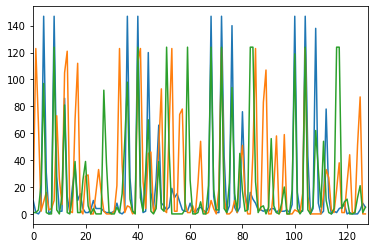

In [27]:
# load image 
img_book = cv2.imread("book.jpg")
# copy image
img_disp_book = img.copy()
# convert to RGB
img_book = cv2.cvtColor(img_book, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp_book, cv2.COLOR_BGR2RGB)

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create() # replace with SURF_create() for SURF features

# 1. Compute SIFT keypoints for the reference image.

# compute SIFT descriptors
# Every row give you one key point
# Cant have multiple key points in one descriptors
# The row is the descriptor and column is the 
keypoints_origin, descriptors_origin = sift.compute(img_book, keypoints)
print('Num keypoints: '+ str(len(keypoints)))

# Alternatively, we can use keypoints,descriptors = sift.detectAndCompute(img) to get both

# num of SIFT keypoints/descriptors
print('descriptors size: '+ str(descriptors_origin.shape))

# plot a couple of 1x128 SIFT descriptors
num = 3
for i in range(num):
    # plot the 256x1 np array using matplotlib plot()
    plt.plot(descriptors_origin[i])
    plt.xlim([0,128]) # set x-axis limit
plt.show()

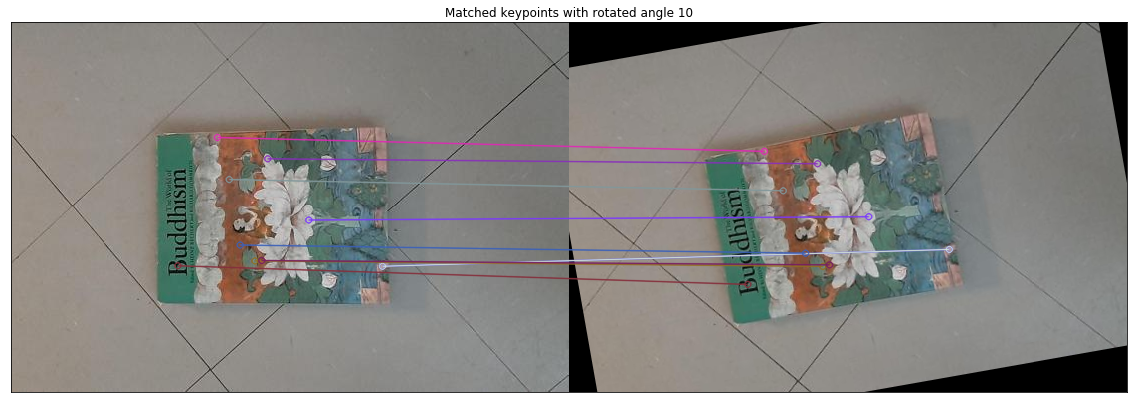

descriptors size: (385, 128)


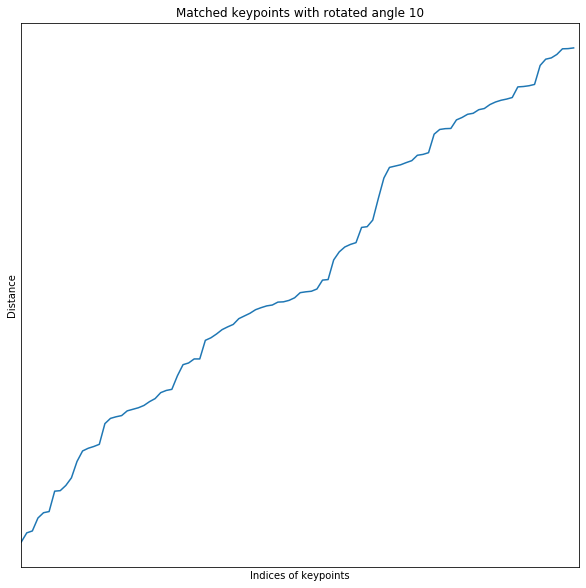

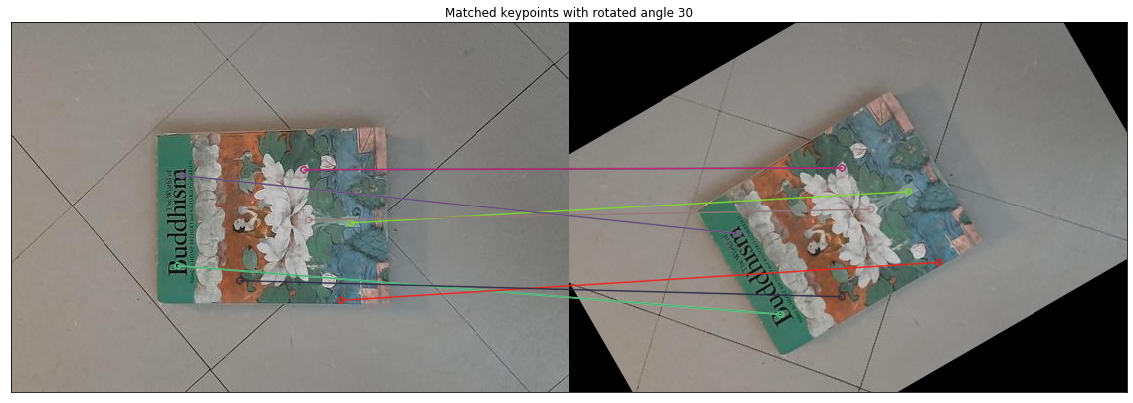

descriptors size: (385, 128)


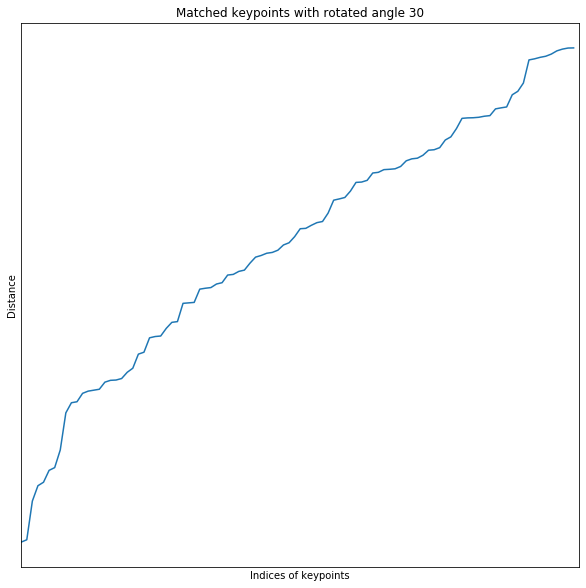

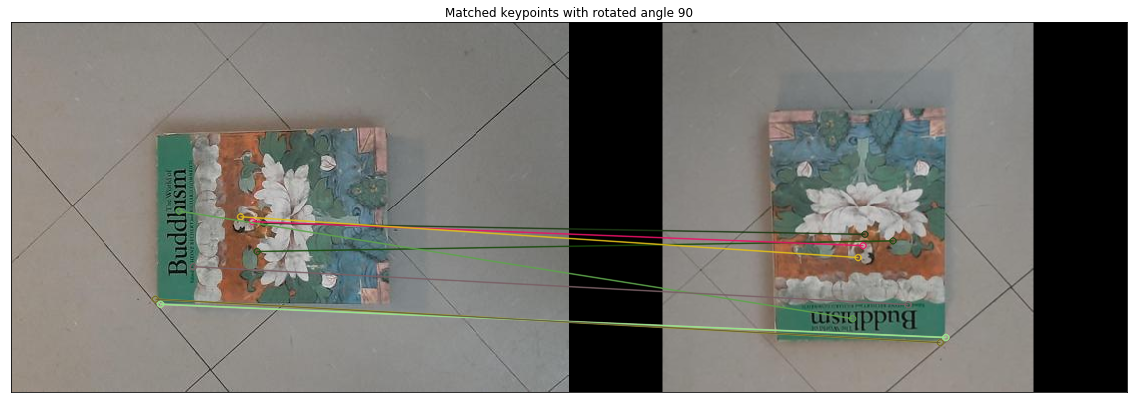

descriptors size: (385, 128)


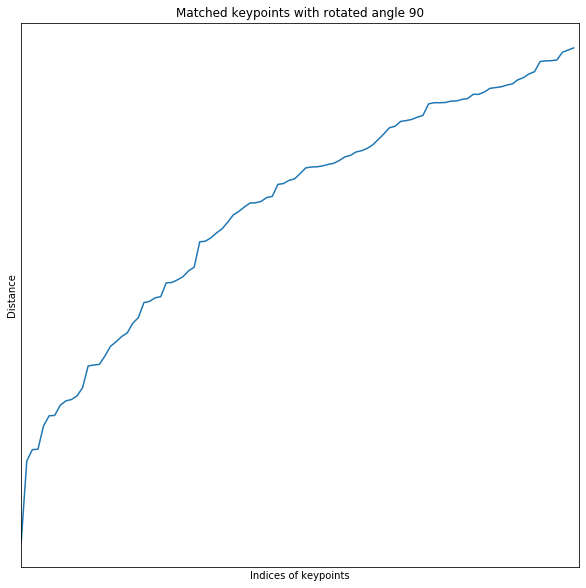

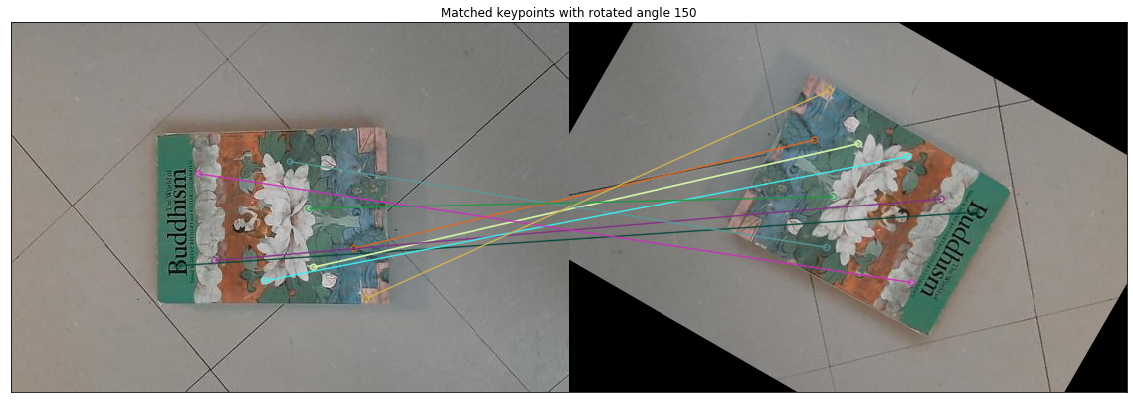

descriptors size: (385, 128)


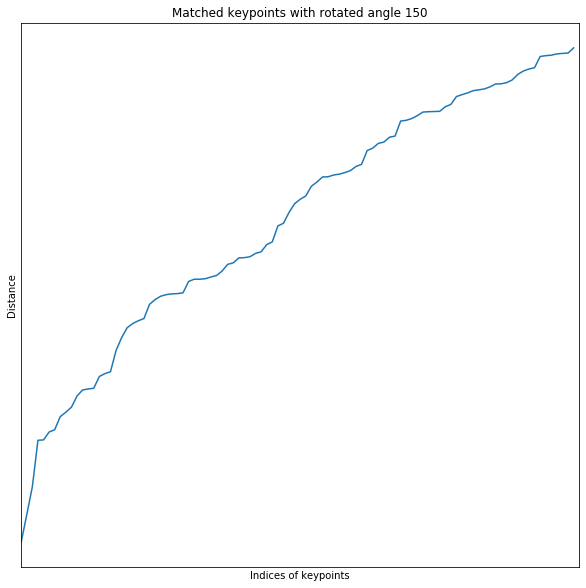

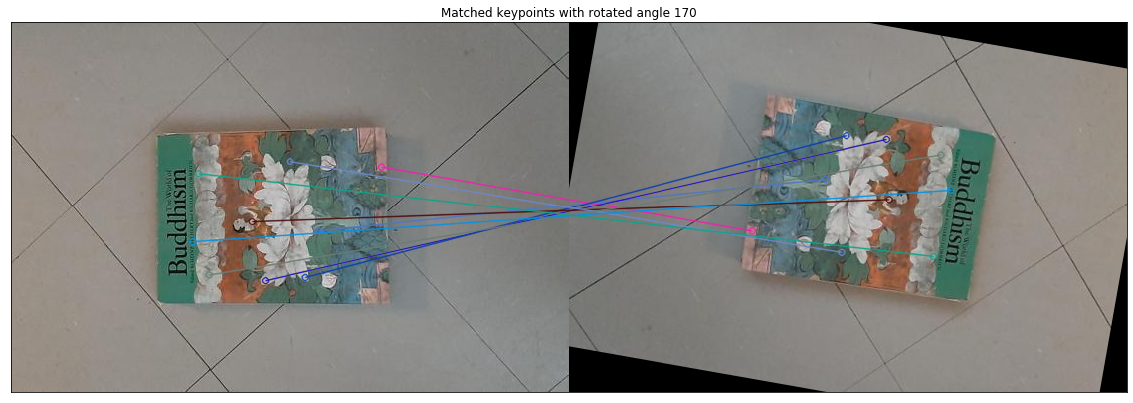

descriptors size: (385, 128)


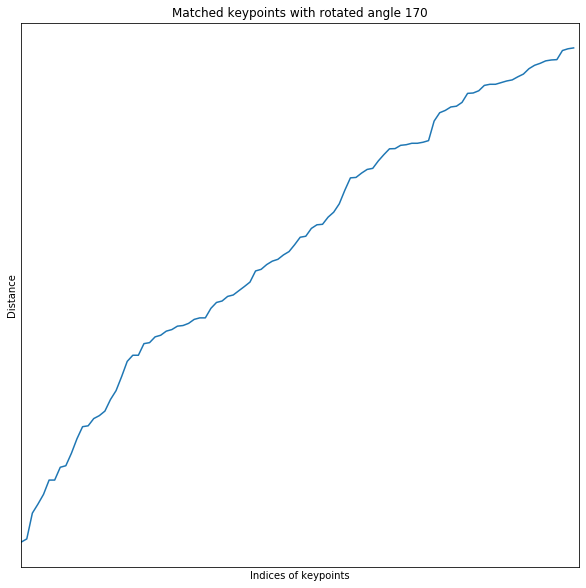

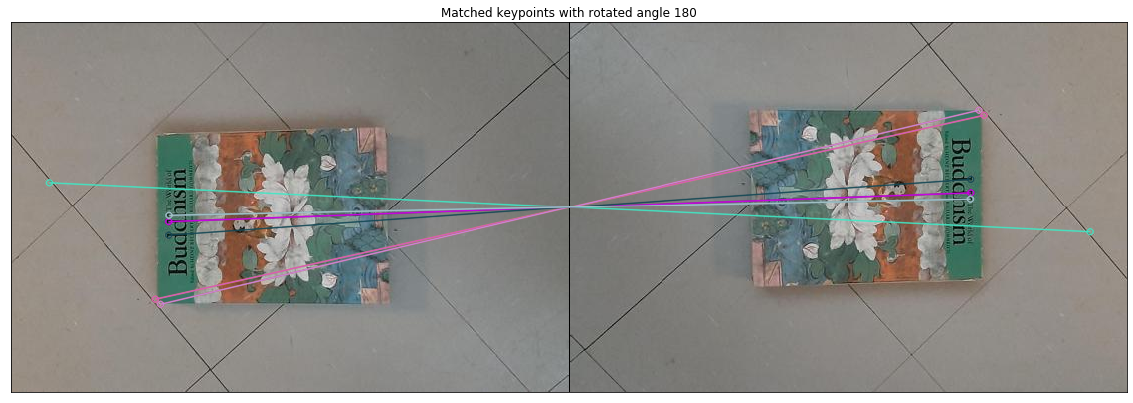

descriptors size: (385, 128)


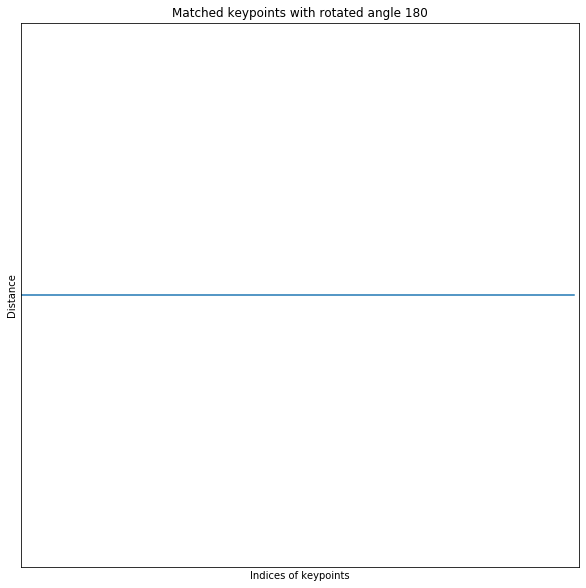

In [31]:
# load image 
img_book = cv2.imread("book.jpg")
# copy image
img_disp_book = img_book.copy()
# convert to RGB
img_book = cv2.cvtColor(img_book, cv2.COLOR_BGR2RGB)
img_disp = cv2.cvtColor(img_disp_book, cv2.COLOR_BGR2RGB)

height, width = img_book.shape[0:2] # image size

angles = {10,30,90,150,170,180}
image_book_rotated = {}

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create() # replace with SURF_create() for SURF features

title = "Matched keypoints with rotated angle {}"


# 2. Rotate reference image at the angle of (10,30,90,150,170,180) degrees.
for angle in sorted(angles):
    # Create a rotated, scaled duplicate
    # rotation marix around the center pixel, 10,30,90,150,170,180 degrees,scale of 1
    # Actually get the pivot, so it not necessary is 1/2
    M_rotated = cv2.getRotationMatrix2D((width/2,height/2),angle,1)
    # Apply the transformation matrix
    # Why i need the size of the image: if I transform it (rotate it) the object is actually out of the image
    image_book_rotated[angle] = cv2.warpAffine(img_book,M_rotated,(width,height))
    # detect SIFT features, with no masks
    # 'None' is a mask but here is no masks so it is none
    # Sometime we want to just compute the key points just in the mask
    img_book_cpoy = img_book.copy()
    image_rotated_copy = image_book_rotated[angle].copy()
    keypoints,descriptors = sift.detectAndCompute(img_book_cpoy,None)
    keypoints_rotated,descriptors_rotated = sift.detectAndCompute(image_rotated_copy, None) 
    # create BFMatcher object
    # BF == brute force
    bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)\
    # Match descriptors.
    # Match the first arguement to the second
    matches = bf.match(descriptors,descriptors_rotated) #query image, train image
    # 5. Sort matching keypoints according to the matching distance. (2 points)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    # 6. Display top ten matched keypoints for each pair of reference image and a transformed image.     
    # Draw first 10 matches.
    img_matches = cv2.drawMatches(img_book_cpoy,keypoints
                                  ,image_rotated_copy,keypoints_rotated, matches[:10], None, flags=2)
    plt.figure(figsize=(20,20))
    plt.imshow(img_matches)
    plt.title(title.format(angle)), plt.xticks([]), plt.yticks([])
    plt.show()
    
        # num of SIFT keypoints/descriptors
    print('descriptors size: '+ str(descriptors.shape))

#     for match in sorted(matches):
        # plot the 256x1 np array using matplotlib plot()
    plt.figure(figsize=(10,10))
    x = []
    y = []
    i = 0
    for match in matches[:100]:
        x.append(i)
        y.append(match.distance)
        i = i + 1
    plt.plot(x,y)
    plt.ylabel("Distance")
    plt.xlabel("Indices of keypoints")
    plt.xlim([0,100]) # set x-axis limit
    plt.title(title.format(angle)), plt.xticks([]), plt.yticks([])
    plt.show()

## 2 Matching using SIFT - Book Reveal

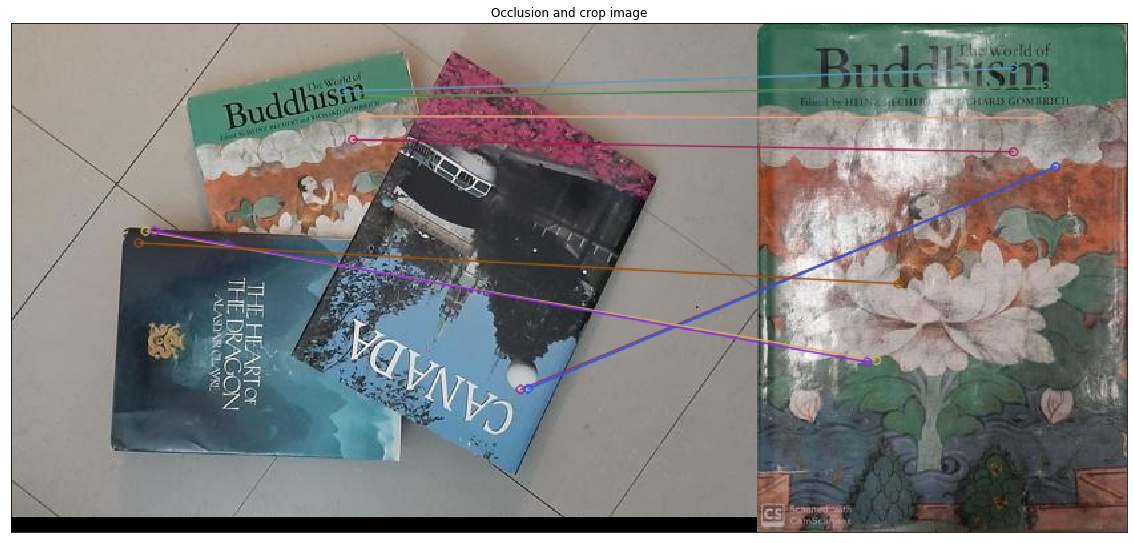

In [143]:
# Find SIFT keypoints in given input images.
# load image 
img_occlusion = cv2.imread("book_occlusion.jpg")
img_crop = cv2.imread("book_crop.jpg")
# copy image
img_occlusion_copy = img_occlusion.copy()
img_crop_copy = img_crop.copy()
# convert to RGB
img_occlusion = cv2.cvtColor(img_occlusion, cv2.COLOR_BGR2RGB)
img_occlusion_copy = cv2.cvtColor(img_occlusion_copy, cv2.COLOR_BGR2RGB)
img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)
img_crop_copy = cv2.cvtColor(img_crop_copy, cv2.COLOR_BGR2RGB)

# # Create a rotated, scaled duplicate
# # rotation marix around the center pixel, -30 degrees,scale of 1
# # Actually get the pivot, so it not necessary is 1/2
# M_rotated = cv2.getRotationMatrix2D((width/2,height/2),15,0.65)
# # Apply the transformation matrix
# # Why i need the size of the image: if I transform it (rotate it) the object is actually out of the image
# img_crop_copy = cv2.warpAffine(img_crop_copy,M_rotated,(width,height))

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create() # replace with SURF_create() for SURF features
title = "Occlusion and crop image"
# detect SIFT features, with no masks
# 'None' is a mask but here is no masks so it is none
# Sometime we want to just compute the key points just in the mask
keypoints_occlusion,descriptors_occlusion = sift.detectAndCompute(img_occlusion_copy,None)
keypoints_crop,descriptors_crop = sift.detectAndCompute(img_crop_copy,None)

# create BFMatcher object
# BF == brute force
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)\

# Match keypoints of reference image to the keypoints of the occluded image using brute-force method.
# Match descriptors.
# Match the first arguement to the second
matches = bf.match(descriptors_occlusion,descriptors_crop) #query image, train image

# Sort matching keypoints according to the matching distance.
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Display top ten matching keypoints.
# Draw first 10 matches.
img_matches = cv2.drawMatches(img_occlusion_copy,keypoints_occlusion
                              ,img_crop_copy,keypoints_crop, matches[:10], None, flags=2)
plt.figure(figsize=(20,20))
plt.imshow(img_matches)
plt.title(title), plt.xticks([]), plt.yticks([])
plt.show()

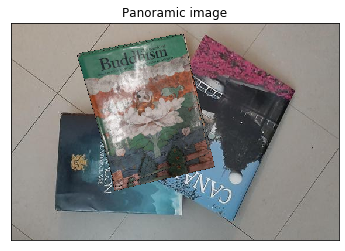

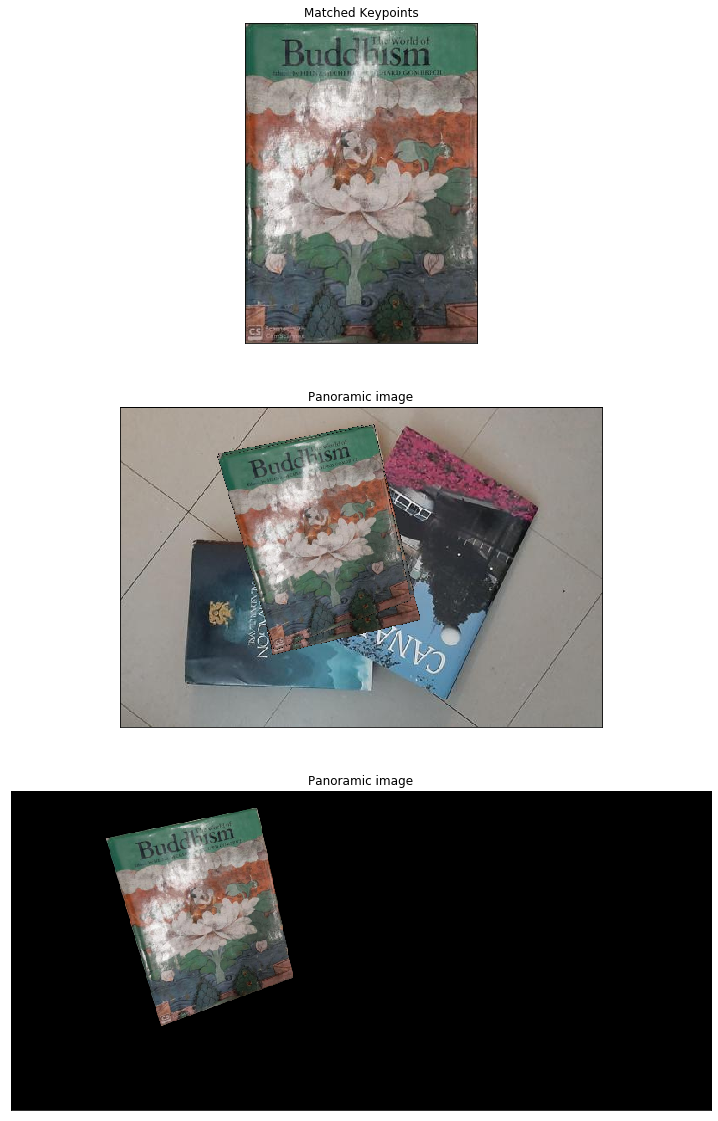

In [156]:
# # Create a rotated, scaled duplicate
# # rotation marix around the center pixel, -30 degrees,scale of 1
# # Actually get the pivot, so it not necessary is 1/2
# M_rotated = cv2.getRotationMatrix2D((width/2,height/2),15,0.65)
# # Apply the transformation matrix
# # Why i need the size of the image: if I transform it (rotate it) the object is actually out of the image
# img_crop_copy = cv2.warpAffine(img_crop_copy,M_rotated,(width,height))

# Compute a homography to align the images using RANSAC method and apply the transformation on the reference image.
# Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches):
    if m.distance < 200:
        GoodMatches.append((m.queryIdx, m.trainIdx))
mp_occlusion = np.float32([keypoints_occlusion[i].pt for (i, __) in GoodMatches])
mp_crop = np.float32([keypoints_crop[i].pt for (__, i) in GoodMatches])

H, __ = cv2.findHomography(mp_crop, mp_occlusion, cv2.RANSAC, 1)

wimg = cv2.warpPerspective(img_crop_copy, H, (img_occlusion_copy.shape[1]+img_crop_copy.shape[1]
                                                   ,img_crop_copy.shape[0]))

for i in range(wimg.shape[0]):
    for j in range(wimg.shape[1]):
        for k in range(wimg.shape[2]):
            if np.all(wimg[i, j, k] != 0):
                img_occlusion[i,j,k] = wimg[i,j,k]

plt.imshow(img_occlusion)
plt.title("Panoramic image"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.imshow(img_crop_copy)
plt.title("Matched Keypoints"), plt.xticks([]), plt.yticks([])
plt.subplot(312)
plt.imshow(img_occlusion)
plt.title("Panoramic image"), plt.xticks([]), plt.yticks([])
plt.subplot(313)
plt.imshow(wimg)
plt.title("Panoramic image"), plt.xticks([]), plt.yticks([])
plt.show()
